# Assignment 1  - Melbourne Housing Dataset

Practice using Pandas (20 Points)

Please see Canvas/Gradescope for the due date of this assignment. One student per group should upload the completed .ipynb file to Gradescope. 

### Add your name(s) and EIDs below
- Student Name: Siem Yonas
- Student UT EID: sby237
- Partner Name:
- Partner UT EID:

### Grading clarifications
1. **Please do not change the variable names** we give you for your answer to each question. You can use other variables if you wish, but the final answer must be stored in that variable.
2. Questions 5 and 6 will be graded manually, since they require you to create a plot.
3. After submitting, you may see "All test cases passed!" for Public Tests. Please note that this doesn't mean you have correctly answered every question, as there are no public tests. We will be using a series of hidden tests to verify your answers are correct.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

First of all, we load the data from a CSV file into memory in a Pandas Dataframe format. 

In [ ]:
df = pd.read_csv('melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


# Q1
How many unique suburbs are there? (2 points)

<!-- BEGIN QUESTION -->



In [3]:
num_unique_suburbs = df['Suburb'].nunique()
num_unique_suburbs

314

<!-- END QUESTION -->

# Q2
How many unique properties are there? (2 points)

Unique properties can be identified solely by the address, or GPS coordinates can also be considered.

<!-- BEGIN QUESTION -->



In [4]:
num_unique_properties = df.groupby(['Address', 'Lattitude', 'Longtitude']).ngroups
num_unique_properties

# or
# num_unique_properties = len(df[['Address', 'Lattitude', 'Longtitude']].drop_duplicates())

13496

<!-- END QUESTION -->

# Q3
What is the mean price of a property in the Kensington suburb? (2 points)


<!-- BEGIN QUESTION -->



In [5]:
mean_price = df[df.Suburb == 'Kensington']['Price'].mean()
mean_price

831667.4358974359

<!-- END QUESTION -->

## Q3.1 (extra) 
What is the median price of a property in the Kensington suburb? (1 extra point)

<!-- BEGIN QUESTION -->



In [6]:
median_price = df[df.Suburb == 'Kensington']['Price'].median()
median_price

812000.0

<!-- END QUESTION -->

# Q4 
What percentage of properties contain a YearBuilt value? (2 points)

As we see in the table, we do not have for each house the "YearBuild" value and some of them are NaN and not filled. 
We want to find out the percentage of homes that we know their build year. 

<!-- BEGIN QUESTION -->



In [7]:
pct_with_year_built = df.YearBuilt.count()/len(df) * 100
pct_with_year_built

60.41973490427098

<!-- END QUESTION -->

# Q5
Create a histogram plot that shows the data distribution of the Landsizes using 20 bins. (2 points)

Describe the shape of this histogram plot and your interpretations in one paragraph. 

<!-- BEGIN QUESTION -->



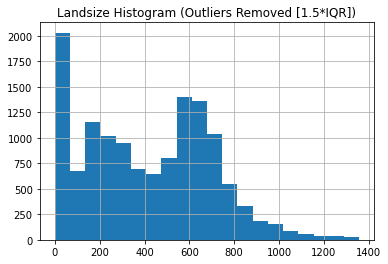

In [15]:
# Get quartiles and calculate IQR
q1, q3 = df.Landsize.quantile(q=[0.25, 0.75])
iqr = q3-q1
lower, upper = q1-1.5*iqr, q3+1.5*iqr # Upper and lower bounds for plot

s = df.Landsize[df.Landsize.between(lower, upper)].dropna() # Series with outliers removed
s.hist(bins=20)
_ = plt.title("Landsize Histogram (Outliers Removed [1.5*IQR])")

The histogram looks right-skewed and bimodal. The overwhelming majority of buildings have very small property sizes. However, a few of the properties have large landsizes that skew the data rightwards. The main mode seems to be around 0-70, with another minor mode around 500-700. The mean and median seem to be around 400. 

<!-- END QUESTION -->

# Q6 
Plot a scatter plot of price as a function of BuildingArea using only rows that have a valid BuildingArea value. (2 points)

- Create a scatter plot that has BuildingArea as x-axis and Price as y-axis.
- Please make sure your scatter plot is legible, do not let outliers dominate your graph. If you limit/trim/don't show all the data, always inform the reader of the graph of what you have done and what they are viewing.

<!-- BEGIN QUESTION -->



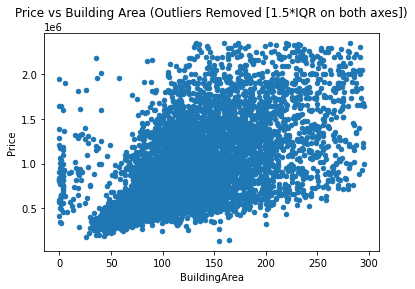

In [14]:
# Get quartiles and calculate IQR
# [b]uilding area
b_q1, b_q3 = df.BuildingArea.quantile(q=[0.25, 0.75])
b_iqr = b_q3 - b_q1
b_lower, b_upper = b_q1-1.5*b_iqr, b_q3+1.5*b_iqr

# [p]rice
p_q1, p_q3 = df.Price.quantile(q=[0.25, 0.75])
p_iqr = p_q3 - p_q1
p_lower, p_upper = p_q1-1.5*p_iqr, p_q3+1.5*p_iqr

# Series with outliers removed biaxially 
s = df[df.BuildingArea.between(b_lower, b_upper) & df.Price.between(p_lower, p_upper)].dropna(subset=['BuildingArea'])
s.plot.scatter('BuildingArea', 'Price')

_ = plt.title(f"Price vs Building Area (Outliers Removed on both axes [1.5*IQR])")

<!-- END QUESTION -->

# Q7 
Who are the top-10 seller/listing agents? And what percentage of properties they have listed? (2 points)  

Your returned DataFrame should have the following columns:
- SellerG
- Percent
- (You can also leave the counts in if you would like.)

I'm going to assume that the SellerG column is the name of the seller group, so "realtor" in US parlance.  So, that column is interpreted as the seller that listed the property.

<!-- BEGIN QUESTION -->



In [10]:
seller_percents = df['SellerG'].value_counts(normalize=True) * 100 # Series with seller percents
df_sellers = seller_percents.to_frame(name="Percent").reset_index(names="SellerG") # convert series to df

df_sellers[0:10]

,SellerG,Percent
0,Nelson,11.524300
1,Jellis,9.690722
2,hockingstuart,8.593520
3,Barry,7.444772
4,Ray,5.162003
5,Marshall,4.852725
6,Buxton,4.653903
7,Biggin,2.893962
8,Brad,2.518409
9,Fletchers,2.216495


<!-- END QUESTION -->

# Q8 

Fix a problem. (2 points)

Your boss has told you that the number of rooms (Rooms column) was calculated incorrectly systematically across the entire dataset. To fix this problem, we want to add a room to the Rooms column. (Add 1 room to each row in Rooms column.)

Solve this problem without using a python for loop, and using a single pandas statement. 

Show your output dataset!

<!-- BEGIN QUESTION -->



In [11]:
df_adjusted = df.assign(Rooms=df.Rooms+1)
df_adjusted

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,3,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,3,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,4,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,4,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,5,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,5,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,4,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,4,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,5,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


<!-- END QUESTION -->

# Q9 
What is the Address of the earliest built house in this dataset? (2 points)


<!-- BEGIN QUESTION -->



In [6]:
address = df.nsmallest(1, 'YearBuilt').iloc[0].Address # df.nsmallest is df -> .iloc to get a Series -> indexed to get a string
address

'5 Armstrong St'

<!-- END QUESTION -->

## Q10 
Save a file. (2 points)

The council member for Melbourne has asked for the information for their district.  Assume that there are legal restrcitions and we can only provide the council member the Suburb, Price, and Date from the CouncilArea "Melbourne" to the council person.  

Export the file with only the allowed columns, and do not write and index column. Pandas automatically adds an index column on the left-most side of the dataframe for easy viewing; do not write this column to the file. Save it as `melb_council_export.csv`.

<!-- BEGIN QUESTION -->



In [13]:
df_melb = df[df.CouncilArea == 'Melbourne'][['Suburb', 'Price', 'Date']]

# Save df_melb to "melb_council_export.csv"
df_melb.to_csv("melb_council_export.csv", index=False)

<!-- END QUESTION -->

